### Context


From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

Johns Hopkins University has made an excellent dashboard using the affected cases data. This data is extracted from the same link and made available in csv format.

In [ ]:
import numpy as np
import pandas as pd
import datetime
import sys
import re
import warnings
warnings.filterwarnings("ignore") 

In [2]:
data= pd.read_csv("2019_nCoV_data.csv",)


In [3]:
data.head()


,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
Sno               434 non-null int64
Province/State    349 non-null object
Country           434 non-null object
Last Update       434 non-null object
Confirmed         434 non-null float64
Deaths            434 non-null float64
Recovered         434 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 23.9+ KB


In [5]:
data['Last Update'] = data['Last Update'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)
data.head()


,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [6]:
#Countries wise


countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))


['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy']

Total countries affected by virus:  27


In [7]:
from datetime import date
data_30 = data[data['Last Update'] > pd.Timestamp(date(2020,1,30))]
data_jan = data[data['Last Update'] > pd.Timestamp(date(2020,1,1))]

data_30.head()


,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
375,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0
377,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0
378,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0
379,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0


In [19]:

total_cases = pd.DataFrame(data_30.groupby('Country')['Confirmed'].sum())
total_cases['Country'] = total_cases.index
total_cases.index=np.arange(1,24)

global_cases = total_cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases


,Country,Confirmed
1,Australia,9.0
2,Cambodia,1.0
3,Canada,3.0
4,Finland,1.0
5,France,5.0
6,Germany,4.0
7,Hong Kong,12.0
8,India,1.0
9,Italy,2.0
10,Japan,11.0


In [22]:
import folium
import json

# Make a data frame with dots to show on the map
world_data = pd.DataFrame({
   'name':list(global_cases['Country']),
    'lat':[-25.27,12.57,56.13,61.92,46.23,51.17,22.32,20.59,41.87,36.2,22.2,35.86,4.21,28.39,12.87,1.35,35.91,7.87,23.7,15.87,37.09,23.42,14.06,],
   'lon':[133.78,104.99,-106.35,25.75,2.21,10.45,114.17,78.96,12.56,138.25,113.54,104.19,101.98,84.12,121.77,103.82,127.77,80.77,120.96,100.99,-95.71,53.84,108.28],
   'Confirmed':list(global_cases['Confirmed']),
})

# create map and display it
world = folium.Map(location=[10, -20], zoom_start=2.3)

for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Confirmed'], world_data['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world)
world

In [10]:
! pip install folium

In [11]:
world.save('countries_affected.html')


In [23]:
# different cases - confirmed, death and recovered
print('Globally Confirmed Cases: ',data_30['Confirmed'].sum())
print('Global Deaths: ',data_30['Deaths'].sum())
print('Globally Recovered Cases: ',data_30['Recovered'].sum())

Globally Confirmed Cases:  9776.0
Global Deaths:  213.0
Globally Recovered Cases:  187.0


In [24]:
# A look at the different cases - confirmed, death and recovered
print('Globally Confirmed Cases for entire january: ',data_jan['Confirmed'].sum())
print('Global Deaths in entire january: ',data_jan['Deaths'].sum())
print('Globally Recovered Cases: ',data_jan['Recovered'].sum())

Globally Confirmed Cases for entire january:  35051.0
Global Deaths in entire january:  802.0
Globally Recovered Cases:  662.0


In [25]:
# Details of various Provinces/States affected in Jan 2020


data_jan.groupby(['Country','Province/State']).sum()


Confirmed  Deaths  Recovered
Country   Province/State                                
Australia New South Wales        16.0     0.0        2.0
          Queensland              4.0     0.0        0.0
          Victoria                6.0     0.0        0.0
Canada    British Columbia        3.0     0.0        0.0
          Ontario                 7.0     0.0        0.0
...                               ...     ...        ...
US        Arizona                 5.0     0.0        0.0
          California             10.0     0.0        0.0
          Chicago                 1.0     0.0        0.0
          Illinois                7.0     0.0        0.0
          Washington              9.0     0.0        0.0

[79 rows x 3 columns]

In [27]:
China = data_jan[data_jan['Country']=='Mainland China']
China

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
38,Anhui,Mainland China,2020-01-23 12:00:00,9.0,0.0,0.0
39,Beijing,Mainland China,2020-01-23 12:00:00,22.0,0.0,0.0
40,Chongqing,Mainland China,2020-01-23 12:00:00,9.0,0.0,0.0
41,Fujian,Mainland China,2020-01-23 12:00:00,5.0,0.0,0.0
42,Gansu,Mainland China,2020-01-23 12:00:00,2.0,0.0,0.0
...,...,...,...,...,...,...
401,Xinjiang,Mainland China,2020-01-30 21:30:00,17.0,0.0,0.0
402,Guizhou,Mainland China,2020-01-30 21:30:00,15.0,0.0,1.0
403,Jilin,Mainland China,2020-01-30 21:30:00,14.0,0.0,1.0
406,Qinghai,Mainland China,2020-01-30 21:30:00,8.0,0.0,0.0


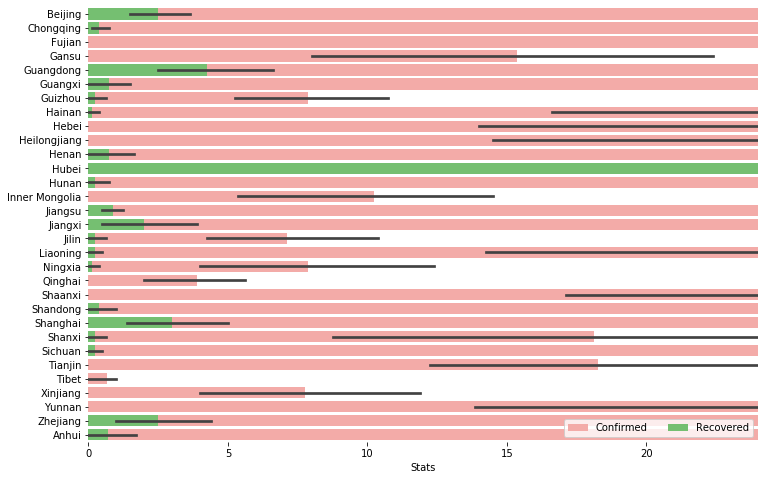

In [30]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 8))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)